In [0]:
from keras.datasets import mnist
from keras.layers import *
import numpy as np
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential,Model
from keras.optimizers import Adam
import math
import matplotlib.pyplot as plt

In [0]:
(X_train,_),(_,_) =mnist.load_data()

In [69]:
print(X_train.shape)

(60000, 28, 28)


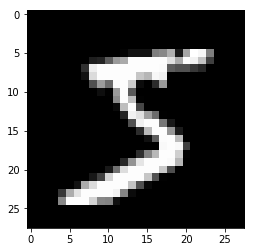

In [70]:
plt.imshow(X_train[0],cmap='gray')
plt.show()

In [71]:
#Normalize the data

X_train= (X_train.astype('float32')-127.5)/127.5
print(np.min(X_train))
print(np.max(X_train))

print(X_train.shape)

-1.0
1.0
(60000, 28, 28)


In [0]:
Total_epochs = 50
Batch_size = 256
no_of_batches = int(X_train.shape[0]/Batch_size)
Half_batch=128

#Basically in each epoch 128 fake and 128 real images will be given to the discriminator to discriminate.
Noise_dim=100 # we will upsample it to 784
adam= Adam(lr=2e-4,beta_1=0.5)

In [73]:
#Generator 
#Input noise 100 and upsample it to 784

generator = Sequential()
generator.add(Dense(256,input_shape=(Noise_dim,)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784,activation='tanh'))

generator.compile(loss='binary_crossentropy' , optimizer=adam)
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 784)               803600    
Total para

In [74]:
#Now we do downsampling
#Discriminator

discriminator=Sequential()
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer=adam)
                  
discriminator.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Gan
discriminator.trainable = False
gan_input = Input(shape=(Noise_dim,))
generated_image=generator(gan_input)
gan_output=discriminator(generated_image)

#Functional API
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

In [76]:
X_train=X_train.reshape((-1,784))
print(X_train.shape)

(60000, 784)


In [77]:
!mkdir model

mkdir: cannot create directory ‘model’: File exists


In [0]:
def save_images(epoch,samples=100):
  noise = np.random.normal(0,1,size=(samples,Noise_dim))
  generated_imgs=generator.predict(noise)
  generated_imgs=generated_imgs.reshape(samples,28,28)
  
  plt.figure(figsize=(10,10))
  for i in range(samples):
    plt.subplot(10,10,i+1)
    plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
    plt.axis('off')
    
  plt.tight_layout()
  plt.savefig('images/gan_output_epoch_{0}.png'.format(epoch+1))
  plt.show()

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1 Disc loss 0.6463 Generator loss 0.9159


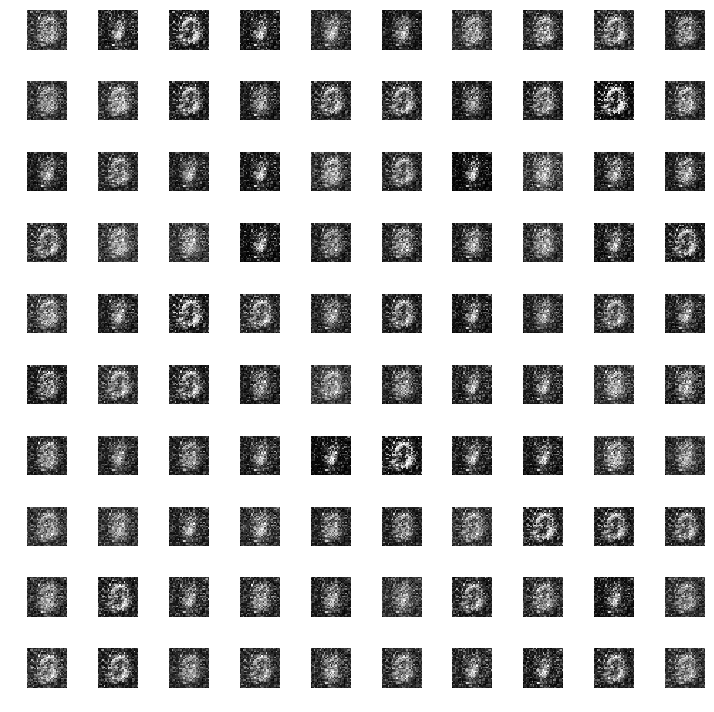

Epoch 2 Disc loss 0.6359 Generator loss 1.0451
Epoch 3 Disc loss 0.6424 Generator loss 1.1008
Epoch 4 Disc loss 0.6191 Generator loss 1.1436
Epoch 5 Disc loss 0.5885 Generator loss 1.2544
Epoch 6 Disc loss 0.5802 Generator loss 1.2757


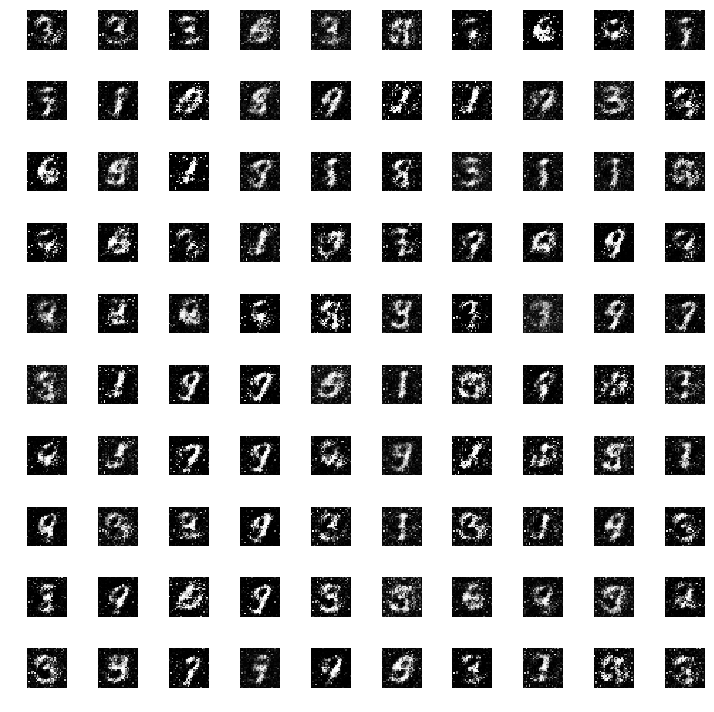

Epoch 7 Disc loss 0.5611 Generator loss 1.3233
Epoch 8 Disc loss 0.5594 Generator loss 1.3446
Epoch 9 Disc loss 0.5900 Generator loss 1.2444
Epoch 10 Disc loss 0.6158 Generator loss 1.1552
Epoch 11 Disc loss 0.6207 Generator loss 1.1033


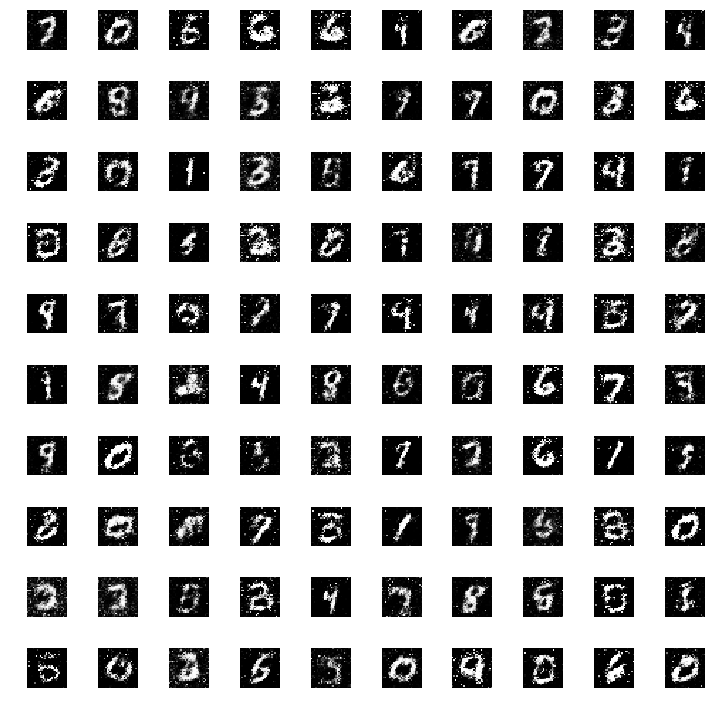

Epoch 12 Disc loss 0.6194 Generator loss 1.1094
Epoch 13 Disc loss 0.6342 Generator loss 1.0663
Epoch 14 Disc loss 0.6383 Generator loss 1.0423
Epoch 15 Disc loss 0.6404 Generator loss 1.0249
Epoch 16 Disc loss 0.6421 Generator loss 1.0318


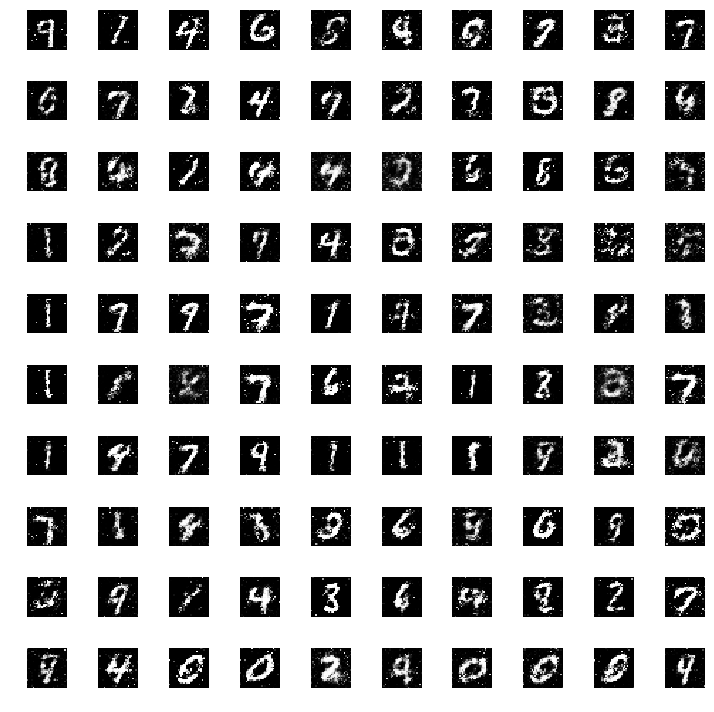

Epoch 17 Disc loss 0.6442 Generator loss 1.0223
Epoch 18 Disc loss 0.6471 Generator loss 1.0218
Epoch 19 Disc loss 0.6515 Generator loss 1.0158
Epoch 20 Disc loss 0.6547 Generator loss 0.9952
Epoch 21 Disc loss 0.6557 Generator loss 0.9980


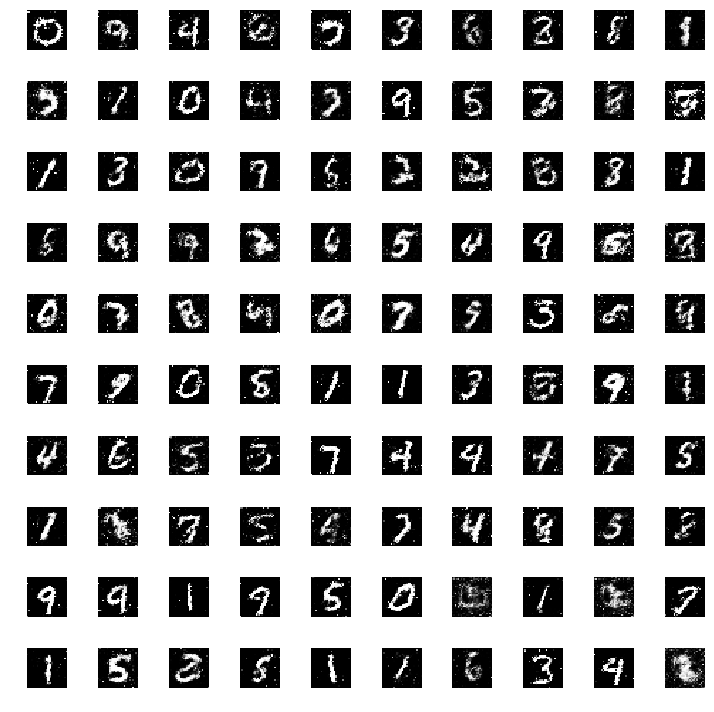

Epoch 22 Disc loss 0.6566 Generator loss 1.0031
Epoch 23 Disc loss 0.6583 Generator loss 0.9926
Epoch 24 Disc loss 0.6585 Generator loss 0.9942
Epoch 25 Disc loss 0.6600 Generator loss 0.9986
Epoch 26 Disc loss 0.6586 Generator loss 0.9990


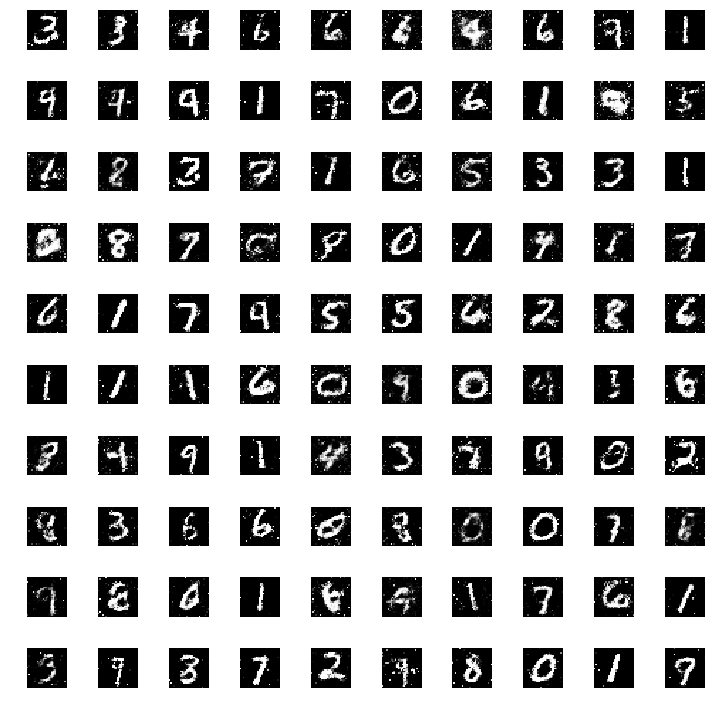

Epoch 27 Disc loss 0.6594 Generator loss 0.9982
Epoch 28 Disc loss 0.6591 Generator loss 1.0007
Epoch 29 Disc loss 0.6595 Generator loss 0.9963
Epoch 30 Disc loss 0.6602 Generator loss 0.9924
Epoch 31 Disc loss 0.6593 Generator loss 0.9942


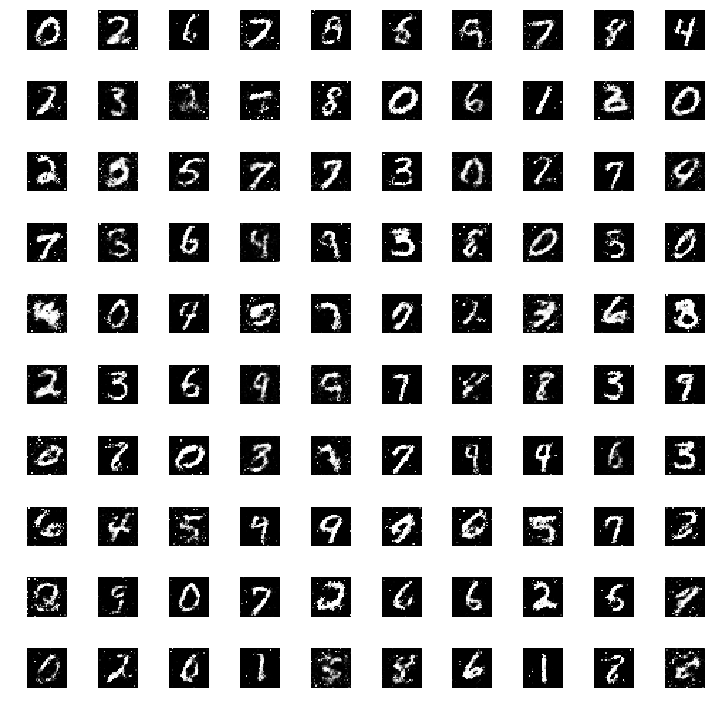

Epoch 32 Disc loss 0.6599 Generator loss 0.9939
Epoch 33 Disc loss 0.6603 Generator loss 0.9910
Epoch 34 Disc loss 0.6622 Generator loss 0.9887
Epoch 35 Disc loss 0.6616 Generator loss 0.9938
Epoch 36 Disc loss 0.6611 Generator loss 0.9946


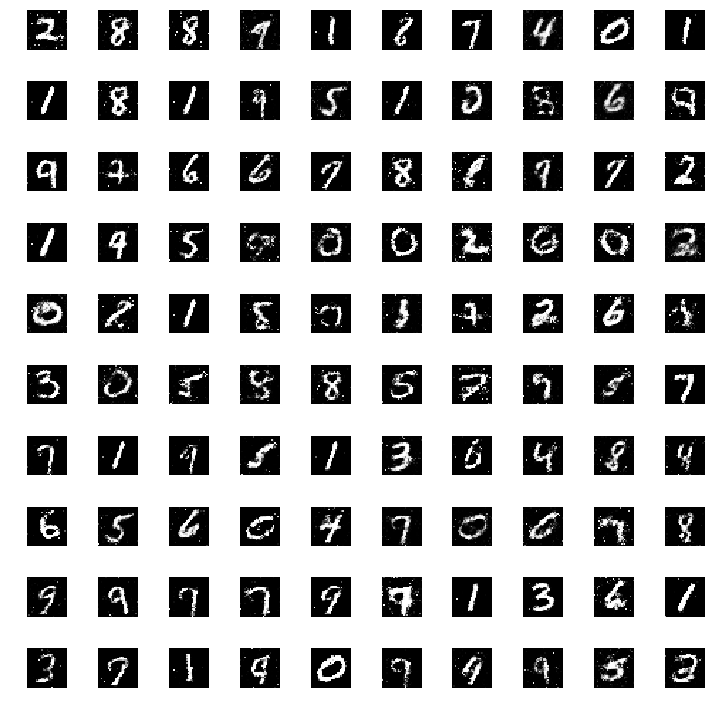

Epoch 37 Disc loss 0.6633 Generator loss 0.9854
Epoch 38 Disc loss 0.6638 Generator loss 0.9841
Epoch 39 Disc loss 0.6633 Generator loss 0.9898
Epoch 40 Disc loss 0.6628 Generator loss 0.9867
Epoch 41 Disc loss 0.6637 Generator loss 0.9851


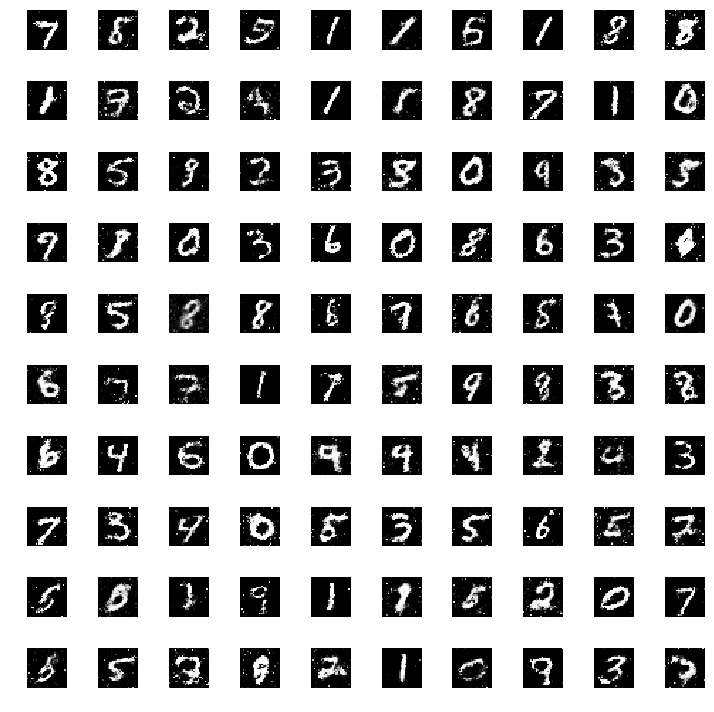

Epoch 42 Disc loss 0.6648 Generator loss 0.9842
Epoch 43 Disc loss 0.6632 Generator loss 0.9877
Epoch 44 Disc loss 0.6652 Generator loss 0.9827
Epoch 45 Disc loss 0.6644 Generator loss 0.9829
Epoch 46 Disc loss 0.6644 Generator loss 0.9818


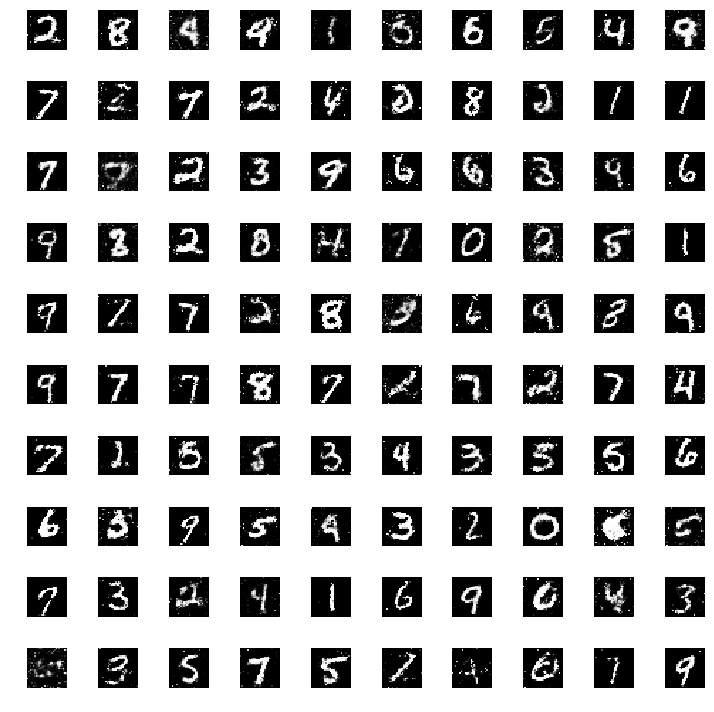

Epoch 47 Disc loss 0.6662 Generator loss 0.9859
Epoch 48 Disc loss 0.6656 Generator loss 0.9846
Epoch 49 Disc loss 0.6653 Generator loss 0.9799
Epoch 50 Disc loss 0.6667 Generator loss 0.9836


In [79]:
#Training loop
d_losses=[]
g_losses=[]

for epoch in range(Total_epochs):
  epoch_d_loss=0
  epoch_g_loss=0
  
  #Mini batch SGD
  for step in range(no_of_batches):
    #Step 1 is to train the discriminator
    #It has 50% real and 50% fake data
    idx = np.random.randint(0,X_train.shape[0],Half_batch)
    #This is random indices from the training data. 0 to 60000 with each idx of 128.128 is the number of images.
    #idx will be a list
    real_images=X_train[idx]
    
    #now fake data
    noise = np.random.normal(0,1,size=(Half_batch,Noise_dim))
    fake_images=generator.predict(noise) #Forward prop. This passes the noise vector through the generator and it generates fake images.
    
    #Now we should also assign labels to the data for discriminator to discriminate.
    real_y = np.ones((Half_batch,1))*0.9
    # this is one sided smoothing. multiplying each 1 by 0.9
    fake_y = np.zeros((Half_batch,1))
    
    #Train the discriminator
    d_loss_real  = discriminator.train_on_batch(real_images,real_y)
    d_loss_fake = discriminator.train_on_batch(fake_images,fake_y)
    d_loss = 0.5*d_loss_real + 0.5*d_loss_fake
    
    epoch_d_loss += d_loss
    
    #Train the generator considering the discriminator is frozen.
    noise = np.random.normal(0,1,size=(Batch_size,Noise_dim))
    # we want the ground truth to be 1 as the generator wants to generate images that the discriminator thinks is real.
    ground_truth_y = np.ones((Batch_size,1))
    g_loss = model.train_on_batch(noise,ground_truth_y)
    epoch_g_loss += g_loss
    
    #This completes the training
    
  print("Epoch %d Disc loss %.4f Generator loss %.4f"%((epoch+1),epoch_d_loss/no_of_batches,epoch_g_loss/no_of_batches))
  d_losses.append(epoch_d_loss/no_of_batches)
  g_losses.append(epoch_g_loss/no_of_batches)
  if (epoch%5==0):
    generator.save('model/gan_generator_{0}.h5'.format(epoch+1))
    save_images(epoch)
    

In [80]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [65]:
!ls

images	model  sample_data


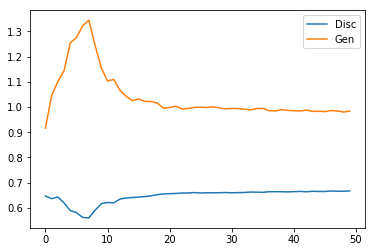

In [82]:
plt.plot(d_losses,label='Disc')
plt.plot(g_losses,label='Gen')
plt.legend()
plt.show()


In [83]:
!zip -r /content/images.zip /content/images

  adding: content/images/ (stored 0%)
  adding: content/images/gan_output_epoch_46.png (deflated 8%)
  adding: content/images/gan_output_epoch_21.png (deflated 8%)
  adding: content/images/gan_output_epoch_6.png (deflated 7%)
  adding: content/images/gan_output_epoch_41.png (deflated 9%)
  adding: content/images/gan_output_epoch_36.png (deflated 8%)
  adding: content/images/gan_output_epoch_11.png (deflated 7%)
  adding: content/images/gan_output_epoch_16.png (deflated 8%)
  adding: content/images/gan_output_epoch_26.png (deflated 8%)
  adding: content/images/gan_output_epoch_1.png (deflated 9%)
  adding: content/images/gan_output_epoch_31.png (deflated 8%)


In [0]:
from google.colab import files
files.download('images.zip')

# New Section